Import libraries

In [1]:
from RiccardoWorkSpace.Strategy import LessRiskPathStrategy as Strategy
from RiccardoWorkSpace.RiskCost import RiskCostWorstCaseFunction
from RiccardoWorkSpace.AlgorithmLibrary import BFSPathSearch

from JacopoWorkSpace.LibraryJacopo import Map, CreateLevel1, CreateLevel2

from SelormWorkSpace.MovingLibrary import Moving

Choose level get the map and create joystick

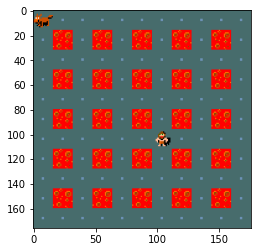

In [2]:
#MapGame, Enviroment = CreateLevel1()
MapGame, Enviroment = CreateLevel2()

Joystick = Moving(Enviroment)

Stategy and successor function

In [3]:
Goal = (5, 34)

def SuccessorFunction(Point):
    
    Result = [(Point[0]-1, Point[1]-1), (Point[0]+1, Point[1]-1),  (Point[0], Point[1]-1),
              (Point[0]-1, Point[1]),   (Point[0]+1, Point[1]),    
              (Point[0]-1, Point[1]+1), (Point[0]+1, Point[1]+1),  (Point[0], Point[1]+1)]
    
    return list(filter(lambda i: MapGame.get_position_symbol(i[0], i[1]) in [".", "@", "d", ">", "<"] or 
                                 MapGame.get_position_symbol(i[0], i[1]) == Goal, Result))

StrategyLogic = Strategy(SuccessorFunction, BFSPathSearch(SuccessorFunction), RiskCostWorstCaseFunction(SuccessorFunction), 2)
StrategyLogic.ActualGoal = Goal  #<--------- Target

Safety First euristhic

Path chosen [(11, 40), (10, 40)]
(11, 40) --> (10, 40)


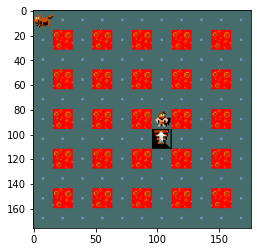

Path chosen [(10, 40), (9, 40)]
(10, 40) --> (9, 40)


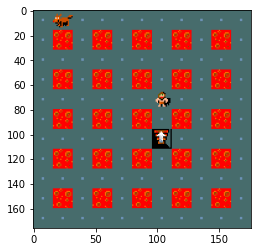

TypeError: __call__() missing 1 required positional argument: 'step'

In [4]:
while(True):
    
    CharacterPosition = MapGame.get_player_location()
    MonsterPositions = MapGame.get_monsters_location()

    if CharacterPosition==StrategyLogic.ActualGoal:
        
        print("Target reached!")
        break

    else:
        
        NextStep = StrategyLogic.Calculate(CharacterPosition, MonsterPositions)

        print("Path chosen", StrategyLogic.GetActualPath())
        print(f"{CharacterPosition} --> {NextStep}")
        
        NewState = Joystick.Move(CharacterPosition, NextStep)
        MapGame = Map(NewState)
    
        MapGame.view_map()
